In [127]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
from sympy import *
import matplotlib.pyplot as plt


---
# VIDEO: Concept and uses of the inverse
---


[[1.000 0.000 -0.000]
 [0.000 1.000 0.000]
 [-0.000 0.000 1.000]]


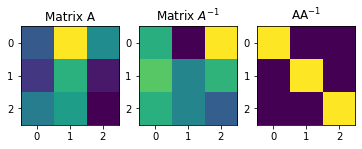

In [128]:
# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)

# compute its inverse
Ainv = np.linalg.inv(A)

# and check the multiplication
id = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(id)


# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(id)
plt.title('AA$^{-1}$')

plt.show()

# MCA algorithm in code

In [129]:
# compute the inverse using inv(), 
# compare to your implementation of the MCA

m = 5

A = np.random.randn(m,m)

# compute the minors matrix

Minors = np.zeros((m,m))
def minor(M, i, j):
    M = np.delete(M, i, 0)
    M = np.delete(M, j, 1)
    return M

for i in range(m):
    for j in range(m):
        Minors[i,j] = np.linalg.det(minor(A, i, j))
        
# Compute H and C matrix
H = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        H[i,j] = (-1) ** (i+j)
        
C = np.multiply(Minors.transpose(), H)
Ainv = C/np.linalg.det(A)
#np.multiply(Ainv, A)
Ainv2 = np.linalg.inv(A)

A @ Ainv

array([[1.000, 0.000, -0.000, -0.000, -0.000],
       [-0.000, 1.000, 0.000, 0.000, -0.000],
       [-0.000, 0.000, 1.000, 0.000, 0.000],
       [-0.000, 0.000, -0.000, 1.000, -0.000],
       [0.000, 0.000, -0.000, -0.000, 1.000]])


---
# VIDEO: Computing the inverse via row reduction
---


Size of Aaug: (4, 8)


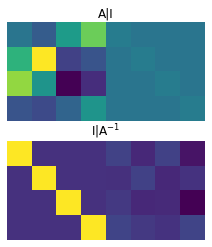

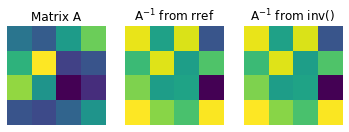

In [130]:
## notice the difference in implementation in this video using sympy, compared to the previous video using numpy ##

# matrix size
m = 4

# random integers matrix
A = Matrix( np.round(10*np.random.randn(m,m)),dtype='float' )

# augment A and identity
Aaug = Matrix( np.concatenate((A,np.eye(m,m)),axis=1) )
print('Size of Aaug:',Aaug.shape)

# rref
Asol = Aaug.rref()
Asol = Asol[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

# show the augemented matrices
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug,dtype='float'))
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()


# show the square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

plt.show()

# Diagonal matrices and their inverse

In [160]:
# Start with 2x2 integers, work up to larger matrices
# Compute their inverses (condition on the diagonal matrix for invertibility)
# ... think ...

A = np.array([[2, 0],[0,3]])
#print(np.linalg.inv(A), "\n")

A2 = np.diag(range(1,6))
#print(A2, '\n')
#print(np.linalg.inv(A2), '\n')

A3 = np.diag(range(1, 11))
A3diag = np.diag(A3)
Idiag = np.diag(np.linalg.inv(A3))
# below produces vector of 1s
np.multiply(A3diag, Idiag)
# produces square of each element
np.divide(A3diag,Idiag)

array([1.000, 4.000, 9.000, 16.000, 25.000, 36.000, 49.000, 64.000,
       81.000, 100.000])


---
# VIDEO: Left inverse and right inverse
---


Rank of A^TA: 3
Rank of AA^T: 3


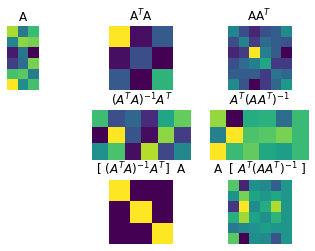

In [163]:
# m>n for left inverse,
# m<n for right inverse
m = 6
n = 3

# create matrices
A = np.random.randn(m,n)
AtA = np.matrix.transpose(A)@A
AAt = A@np.matrix.transpose(A)

# inspect ranks
print('Rank of A^TA:', np.linalg.matrix_rank(AtA) ) 
print('Rank of AA^T:', np.linalg.matrix_rank(AAt) ) 

# left inverse
Aleft = np.linalg.inv(AtA)@np.matrix.transpose(A)

# right inverse
Aright = np.matrix.transpose(A)@np.linalg.inv(AAt)

# now test!
I_left  = Aleft  @ A
I_right = A @ Aright

# and then test using the inverse function
AtA_inv = np.linalg.inv(AtA)
I_AtA   = AtA_inv @ AtA

AAt_inv = np.linalg.inv(AAt)
I_AAt   = AAt_inv @ AAt


## show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()

In [165]:
A = np.random.randn(4,4)
B = np.random.randn(4,4)
np.corrcoef(A,B)
np.corrcoef(A.transpose())

array([[1.000, 0.050, -0.256, -0.342],
       [0.050, 1.000, -0.687, -0.297],
       [-0.256, -0.687, 1.000, -0.343],
       [-0.342, -0.297, -0.343, 1.000]])


---
# VIDEO: The pseudoinverse, part 1
---


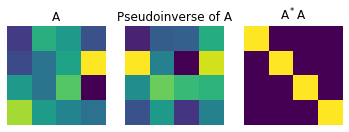

In [166]:
# pseudoinverse of rectangular matrix A

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

rank = 49


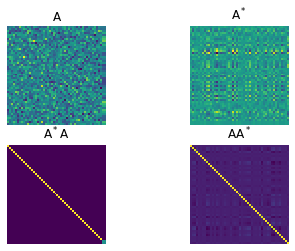

In [167]:

# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))


# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()

# Explore if the psuedoinverse is the same for a 'real' inverse when the matrix is invertable

In [174]:
m = 5
A = np.random.randn(m,m)
AinvF = np.linalg.inv(A)
AinvP = np.linalg.pinv(A)
A @ AinvF
A @ AinvP
AinvF - AinvP

array([[0.000, 0.000, -0.000, 0.000, 0.000],
       [0.000, 0.000, -0.000, 0.000, 0.000],
       [-0.000, 0.000, -0.000, 0.000, -0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, -0.000, -0.000, 0.000, 0.000]])